In [46]:
import numpy as np
from Args import Args
from Utils.ModelResNet50Places365 import ResNet50_Places365
from Utils.DataSetADE20K import ADE20KDataset
from Utils.ModelXception65ADE import Xception65ADE
from Method.ConceptLIME import ConceptLIME

In [47]:
args = Args()
np.random.seed(args.SEED)

In [48]:
# Load ADE20K dataset
dataset = ADE20KDataset(args.get_path("ADE"))

In [51]:
data = dataset.get_test_samples(50,10,10)


In [4]:
# Load model to be explained
# device = torch.device("cpu")
explained_model = ResNet50_Places365(args.DEVICE)

In [5]:
# Load segmentation model
seg_model = Xception65ADE(args.get_path("XCEPTION_ADE"))

2024-01-18 14:27:48.103902: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [61]:
# file_id = "00003096"
# sample_id = np.argwhere(dataset.images == f"DataSet/ADEChallengeData2016/images/training/ADE_train_{file_id}.jpg")[0][0]

In [62]:
# explain
sample_id = 0
clime_explainer = ConceptLIME(explained_model, dataset, seg_model)
explanation = clime_explainer.explain(sample_id, perturbation_cnt=args.SURROGATE_TRAINING_SIZE)

[2024-01-18 15:53:29,261][INFO] explaining image 55
[2024-01-18 15:53:29,267][INFO] selecting neighbors
[2024-01-18 15:53:29,270][INFO] segmenting neighbors
[2024-01-18 15:55:54,586][INFO] making predictions on segments
[2024-01-18 15:55:58,829][INFO] clustering
[2024-01-18 15:55:58,914][INFO] getting perturbation set and predicting on perturbation set
[2024-01-18 15:56:01,147][INFO] training surrogate model
[2024-01-18 15:56:01,151][INFO] finished


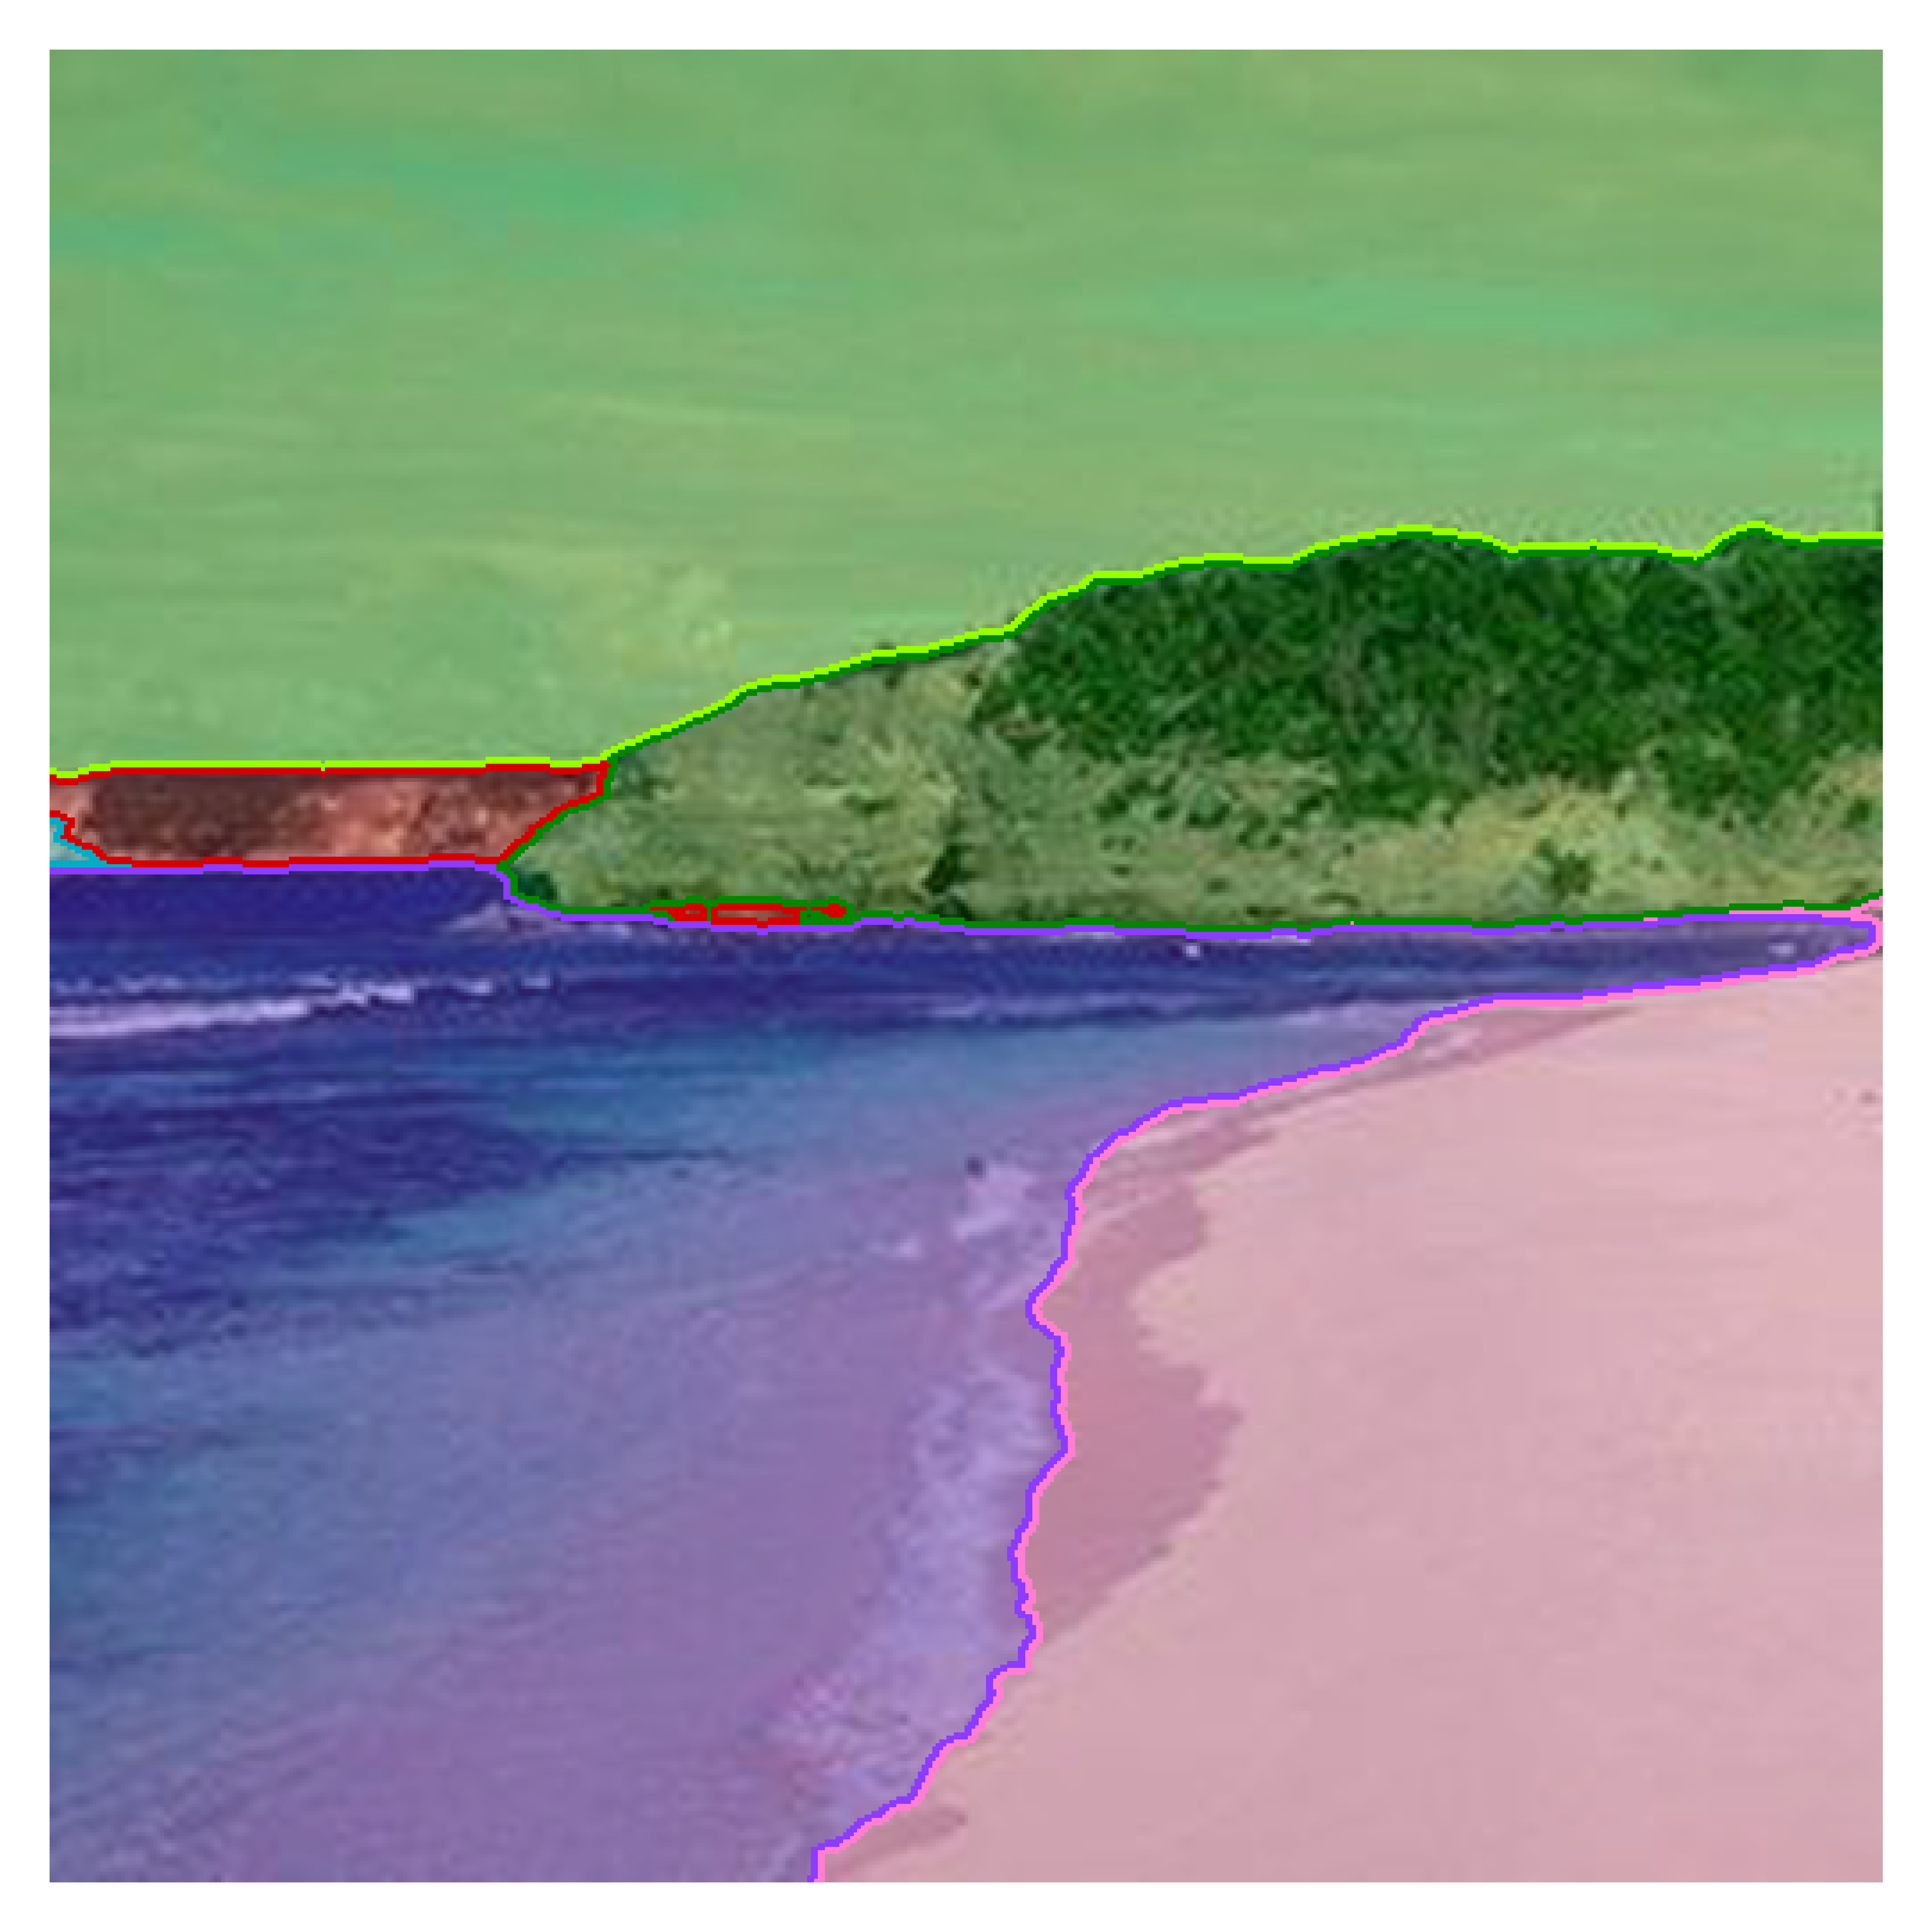

In [64]:
# # plot explanation

# import seaborn as sns
# import colorcet as cc
# import cv2
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# alpha = args.ALPHA
# colors = None
# kernel = None
# save_flag = True
# save_path = None
# legend_flag = False

# img = clime_explainer.current_expanation['img'].copy() / 255
# if colors is None:
#     colors = sns.color_palette(cc.glasbey, n_colors=len(clime_explainer.current_expanation['unique_cid']))
# if kernel is None:
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# for i, cid in enumerate(clime_explainer.current_expanation['unique_cid']):
#     mask = clime_explainer.current_expanation['concept_mask'] == cid

#     img[mask] = (1 - alpha) * img[mask] + alpha * np.array(colors[i])

#     erosion = cv2.erode(mask.astype(np.uint8), kernel)
#     img[np.where(mask - erosion)] = np.array(colors[i])


# plt.figure()
# plt.rcParams["figure.dpi"] = 1200
# plt.imshow(img)
# if legend_flag:
#     patches = []
#     for color, weight in zip(colors, clime_explainer.surrogate_model.coef_):
#         patch = mpatches.Patch(color=color, label=f'{weight:7.4f}')
#         patches.append(patch)
#     plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.axis("off") 
# plt.axis("tight") 
# plt.axis("image")
# if not save_flag:
#     plt.show()
# else:
#     if save_path is None:
#         save_path = f"{args.DIR_RESULT}/Explanation/clime_{file_id}.pdf"
#     plt.savefig(save_path, bbox_inches = 'tight',pad_inches = 0)